In [1]:
#Importamos las librerias necesarias para el análisis de datos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
#Importamos plotly para la visualización de los datos
import plotly.express as px
import plotly.graph_objects as go

#Librerias para pruebas estadísticas
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import anderson


In [2]:
df = pd.read_csv(r'C:\Users\spide\Desktop\Bootcamp\mi_entorno\Moodulo_2\Proyecto_final_modulo_2\Airbnb_Paris.csv')

# EDA (Exploratory Data Analysis)

## 1 -Visualización General

### 1.1 - Histogramas

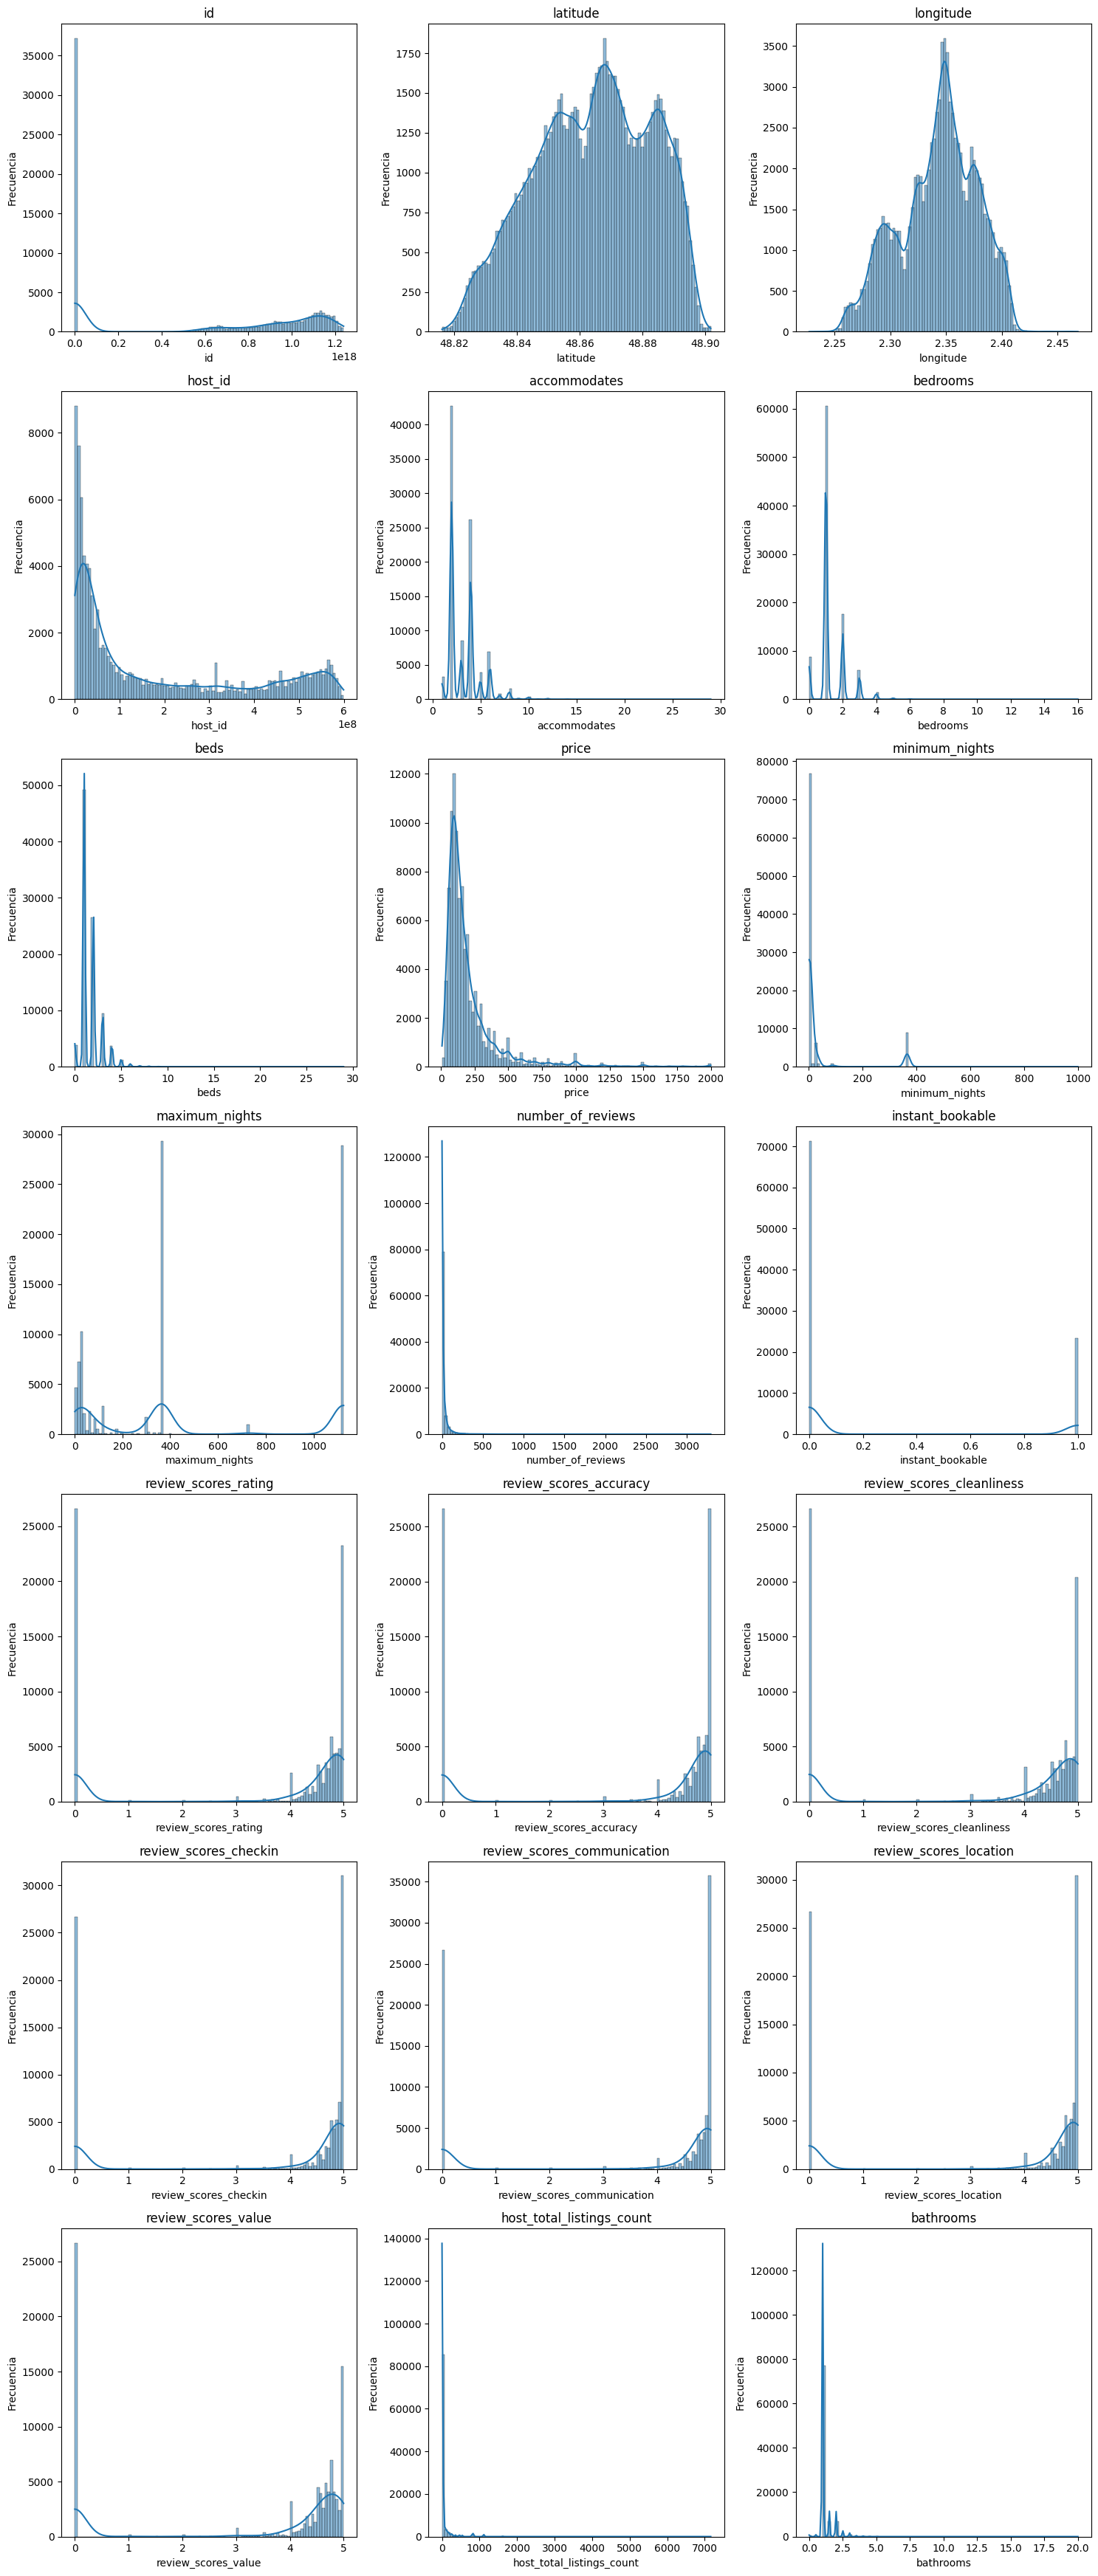

In [3]:

# Seleccionar las variables numéricas
num_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Configurar la figura y los subplots
n_cols = 3  # Número de columnas en la cuadrícula
n_rows = (len(num_vars) + n_cols - 1) // n_cols  # Calcula el número de filas necesario

plt.figure(figsize=(15, n_rows * 5))  # Ajustar el tamaño de la figura

# Iterar sobre las variables numéricas
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i + 1)  # Crear un subplot
    sns.histplot(df[var], kde=True, bins=100)  # Crear histograma con KDE
    plt.title(var)  # Título del gráfico
    plt.xlabel(var)  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y

plt.tight_layout()  # Ajustar diseño
plt.show()


### 1.2 - Boxplot

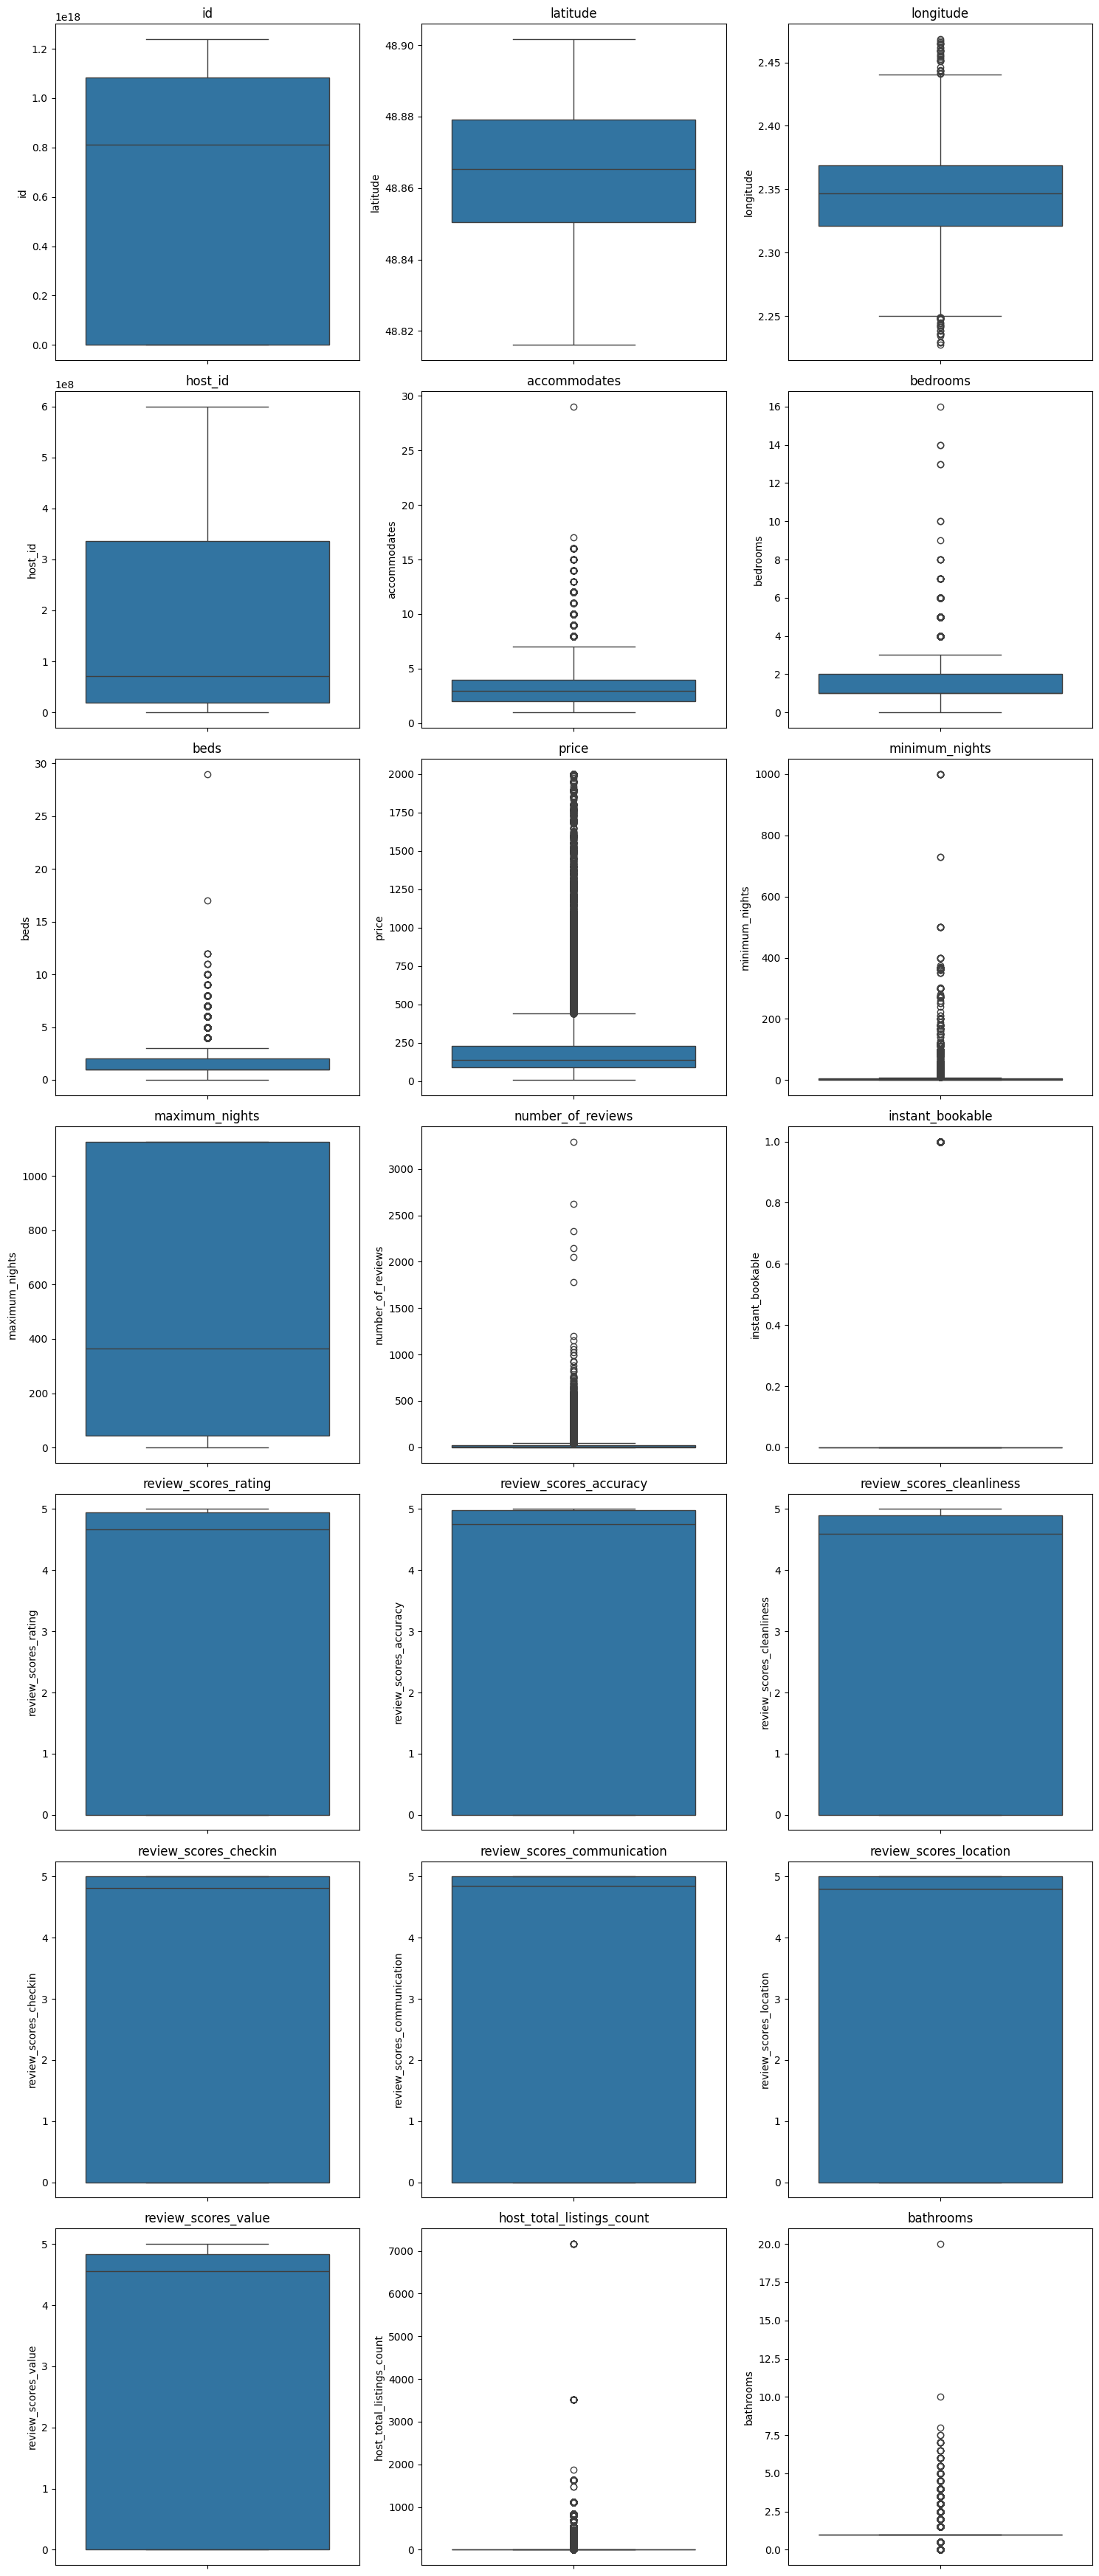

In [4]:
# Seleccionar las variables numéricas
num_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Configurar la figura y los subplots
n_cols = 3  # Número de columnas en la cuadrícula
n_rows = (len(num_vars) + n_cols - 1) // n_cols  # Calcula el número de filas necesario

plt.figure(figsize=(15, n_rows * 5))  # Ajustar el tamaño de la figura

# Iterar sobre las variables numéricas
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i + 1)  # Crear un subplot
    sns.boxplot(y=df[var],showfliers=True)  # Crear el boxplot para la variable
    plt.title(var)  # Título del gráfico
    plt.xlabel('')  # Quitar etiqueta del eje x para claridad

plt.tight_layout()  # Ajustar diseño
plt.show()

#NOTA: Hemos ocultado los outliers ya que se veían demasiados en variables como price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count y availability_365.

## 2 - Precio

### 2.1 - ¿Cuál es el precio promedio por tipo de habitación?

In [5]:
avg_price_by_room_type = df.groupby('room_type')['price'].mean().reset_index()  # Calculamos el precio promedio por tipo de alquiler
fig = px.bar(avg_price_by_room_type, x='room_type', y='price', text='price', title='Precio promedio por tipo de habitación', 
             width=1000, height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')  # Ajustar formato del texto
fig.update_yaxes(title_text='Precio promedio')  # Ajustamos el eje y
fig.show()  # Mostrar gráfico


Vemos que el mayor promedio de precio te lo da la habitación de hotel, seguido de un apartamento entero. Como era de esperar lo que son Habitaciones privadas y compartidas serán las más baratas. Vamos a ver como se distribuye el precio en los hoteles.

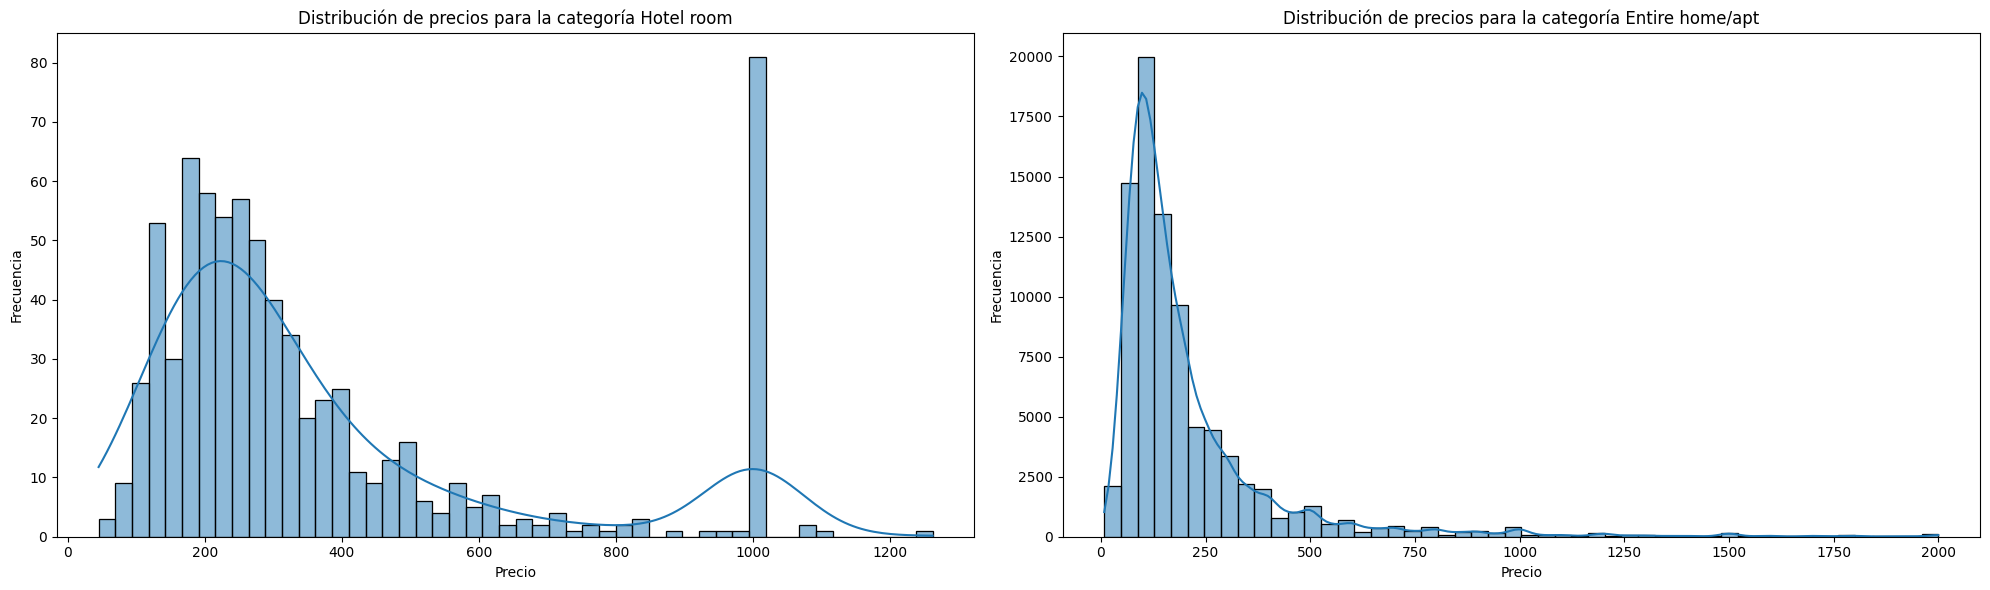

In [6]:
# Filtramos el df para las habitaciones de hotel.
hotel_room_prices = df[df['room_type'] == 'Hotel room']['price']
# Filtramos el df para los apartamentos enteros.
entire_apt_prices = df[df['room_type'] == 'Entire home/apt']['price']  

# Creamos los subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Histograma para los precios de habitaciones de hotel
sns.histplot(hotel_room_prices, kde=True, bins=50, ax=axes[0])
axes[0].set_title('Distribución de precios para la categoría Hotel room')
axes[0].set_xlabel('Precio')
axes[0].set_ylabel('Frecuencia')

# Histograma para los precios de apartamentos enteros
sns.histplot(entire_apt_prices, kde=True, bins=50, ax=axes[1])
axes[1].set_title('Distribución de precios para la categoría Entire home/apt')
axes[1].set_xlabel('Precio')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Se observa que hay alrededor de 80 apartamentos con un precio superior a los 1000$, lo que hace aumentar el promedio del precio en esta categoría. Por lo que es un indicativo de que, **en general las habitaciones de hotel pueden llegar a ser más costosas que los apartamentos enteros**.

### 2.2 - ¿Cómo varía el precio promedio por barrio?

In [7]:
# Calcular el precio promedio por barrio
avg_price_by_neighbourhood = df.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

# Crear el treemap con etiquetas de datos
fig = px.treemap(avg_price_by_neighbourhood, path=['neighbourhood_cleansed'], values='price', 
                 title='Precio promedio por barrio', 
                 color='price', color_continuous_scale='Inferno', 
                 hover_data={'price': ':.2f'},
                 width=1200, height=800)  # Ajustar el tamaño de la figura

# Actualizar las trazas para mostrar el texto
fig.update_traces(texttemplate='%{label}<br>€%{value:.2f}', textposition='middle center')

# Mostrar el gráfico
fig.show()

* **Élysée** es el más caro con diferencia, seguido de **Palais-Bourbon** y **Passy**
* Entre **Observatoire**, **Popincourt** y **Reulli** tenemos precios similares rondando los 170-160 $ la noche.
* Los dos más baratos són **Buttes-Chaumont** y **Menilmontant**.

### 2.3 - ¿Los alojamientos instantaneámente reservables són más caros? ¿Y los que perteneces a un super-anfitrión?

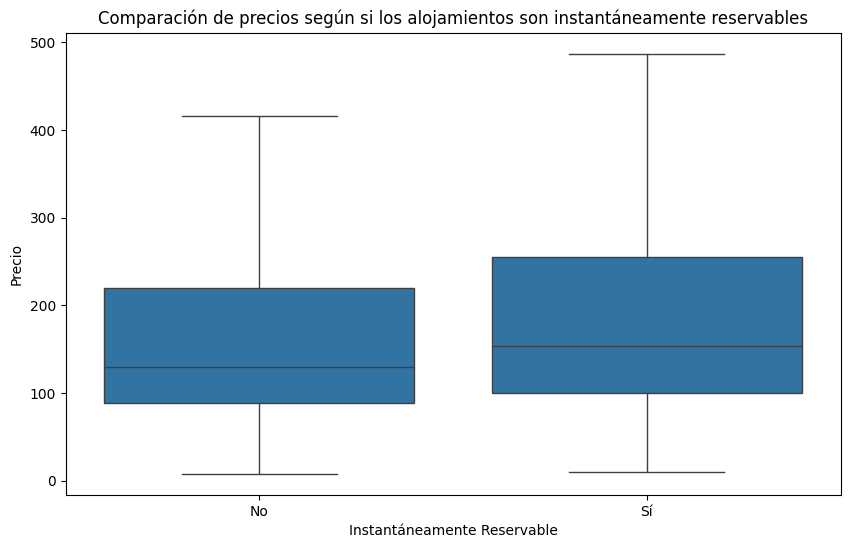

In [8]:
# Crear un boxplot para comparar el precio según si es instantáneamente reservable o no
plt.figure(figsize=(10, 6))
sns.boxplot(x='instant_bookable', y='price', data=df,showfliers=False)  # Crear el boxplot
plt.title('Comparación de precios según si los alojamientos son instantáneamente reservables')
plt.xlabel('Instantáneamente Reservable')
plt.ylabel('Precio')
plt.xticks([0, 1], ['No', 'Sí'])  # Cambiar etiquetas del eje x
plt.show()

A priori parece que la mediana en los que són  instantaneamente reservables es ligeramente superior a los que no, al igual que su tercer cuartil, por lo que es esperable que sea un poco superior (sin tener en cuenta los outliers poniendo *False* en el argumento *showfliers*). Sin embargo ambas categorías presentan una gran cantidad de outliers así que para tener más precisión compararemos su promedio mediante pruebas estadísticas.


In [9]:
# Calcular el precio promedio según si es instantáneamente reservable o no
avg_price_instant_bookable = df.groupby(['instant_bookable', 'room_type'])['price'].mean().reset_index()

# Crear un gráfico de barras
fig = px.bar(avg_price_instant_bookable, x='instant_bookable', y='price', color='room_type', text='price', 
             title='Precio promedio según si es instantáneamente reservable', 
             labels={'instant_bookable': 'Instantáneamente Reservable', 'price': 'Precio Promedio'},
             width=800, height=400)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_xaxes(tickvals=[0, 1], ticktext=['No', 'Sí'])
fig.show()


In [10]:
df['instant_bookable'].value_counts()

instant_bookable
0    71301
1    23361
Name: count, dtype: int64

In [11]:
# Creamos los dos conjuntos de datos para comparar los precios
instant_bookable_false = df[df['instant_bookable'] == 0][['price']]
instant_bookable_true = df[df['instant_bookable'] == 1][['price']]


In [12]:
from scipy.stats import anderson, levene, ttest_ind, mannwhitneyu

def diagrama_flujo_test_hipótesis_Anderson_Darling(conjunto1, conjunto2, alpha=0.05):
    '''En primer lugar se realiza una prueba de Anderson-Darling para determinar si los datos siguen una distribución normal
    Librerías necesarias: 
    from scipy.stats import anderson

    OJO: La prueba de Anderson-Darling en esta función espera una lista o un array unidimensional, no funcionará con un DataFrame
    o una Serie de pandas, por lo que es necesario pasar los datos como una lista o un array.
    '''
    #Convertir los conjuntos a arrays unidimensionales si son DataFrames o Series
    if isinstance(conjunto1, pd.DataFrame) or isinstance(conjunto1, pd.Series):
        conjunto1 = conjunto1.values.flatten()
    if isinstance(conjunto2, pd.DataFrame) or isinstance(conjunto2, pd.Series):
        conjunto2 = conjunto2.values.flatten()
        
    # Se realiza la prueba de Anderson-Darling
    stat_1, crit_1, sig_1 = anderson(conjunto1)
    stat_2, crit_2, sig_2 = anderson(conjunto2)
    print(f"El valor estadístico para el conjunto 1 es: {stat_1} y para el conjunto 2 es: {stat_2}")
    
    if stat_1 < crit_1[2] and stat_2 < crit_2[2]:  # Usamos el valor crítico para el 5% de significancia
        '''La lista de valores críticos (crit_price y crit_reviews) contiene los valores críticos para diferentes niveles de significancia 
        (15%, 10%, 5%, 2.5%, y 1%).El índice [2] corresponde al valor crítico para el nivel de significancia del 5%.'''
        
        print('Ambos conjuntos siguen una distribución normal')

        '''En el caso de que siga una distribución normal se realiza una prueba de Levene para determinar si las varianzas son iguales
        Librerías necesarias:
        from scipy.stats import levene
        ''' 

        # Se realiza la prueba de Levene
        stat_levene, p_levene = levene(conjunto1, conjunto2)
        print(f"El valor p para la prueba de Levene es: {p_levene}")
        if p_levene > alpha:
            print('Ambos conjuntos tienen varianzas iguales, se realiza una prueba t de Student con varianzas iguales')

            '''En el caso de que las varianzas sean iguales se realiza una prueba t de Student
            Librerías necesarias:
            from scipy.stats import ttest_ind
            '''
            # Se realiza la prueba t de Student
            stat_t, p_t = ttest_ind(conjunto1, conjunto2, equal_var=True)
            print(f"El valor p para la prueba t de Student es: {p_t}")
            if p_t < alpha:
                print('Se rechaza la hipótesis nula, ambos conjuntos presentan diferencias significativas')
            else:
                print('No se rechaza la hipótesis nula, ambos conjuntos no presentan diferencias significativas')
        else: 
            print('Ambos conjuntos tienen varianzas diferentes, se realiza una prueba t de Student con varianzas diferentes')

            '''En el caso de que las varianzas sean diferentes se realiza una prueba t de Student
            Librerías necesarias:
            from scipy.stats import ttest_ind
            '''
            # Se realiza la prueba t de Student con varianzas diferentes
            stat_t, p_t = ttest_ind(conjunto1, conjunto2, equal_var=False)
            print(f"El valor p para la prueba t de Student es: {p_t}")
            if p_t < alpha:
                print('Se rechaza la hipótesis nula, ambos conjuntos presentan diferencias significativas')
            else:
                print('No se rechaza la hipótesis nula, ambos conjuntos no presentan diferencias significativas')
    else:
        print('Ambos conjuntos no siguen una distribución normal, se realiza una prueba de Mann-Whitney')

        '''En el caso de que no siga una distribución normal se realiza una prueba de Mann-Whitney
        Librerías necesarias:
        from scipy.stats import mannwhitneyu
        '''
        # Se realiza la prueba de Mann-Whitney
        stat_mw, p_mw = mannwhitneyu(conjunto1, conjunto2)
        print(f"El valor p para la prueba de Mann-Whitney es: {p_mw}")
        if p_mw < alpha:
            print('Se rechaza la hipótesis nula, ambos conjuntos presentan diferencias significativas')
        else:
            print('No se rechaza la hipótesis nula, ambos conjuntos no presentan diferencias significativas')


diagrama_flujo_test_hipótesis_Anderson_Darling(instant_bookable_false,instant_bookable_true, alpha = 0.05)

El valor estadístico para el conjunto 1 es: 7404.269967434782 y para el conjunto 2 es: 2140.5310030319743
Ambos conjuntos no siguen una distribución normal, se realiza una prueba de Mann-Whitney
El valor p para la prueba de Mann-Whitney es: 1.4625498411172601e-154
Se rechaza la hipótesis nula, ambos conjuntos presentan diferencias significativas


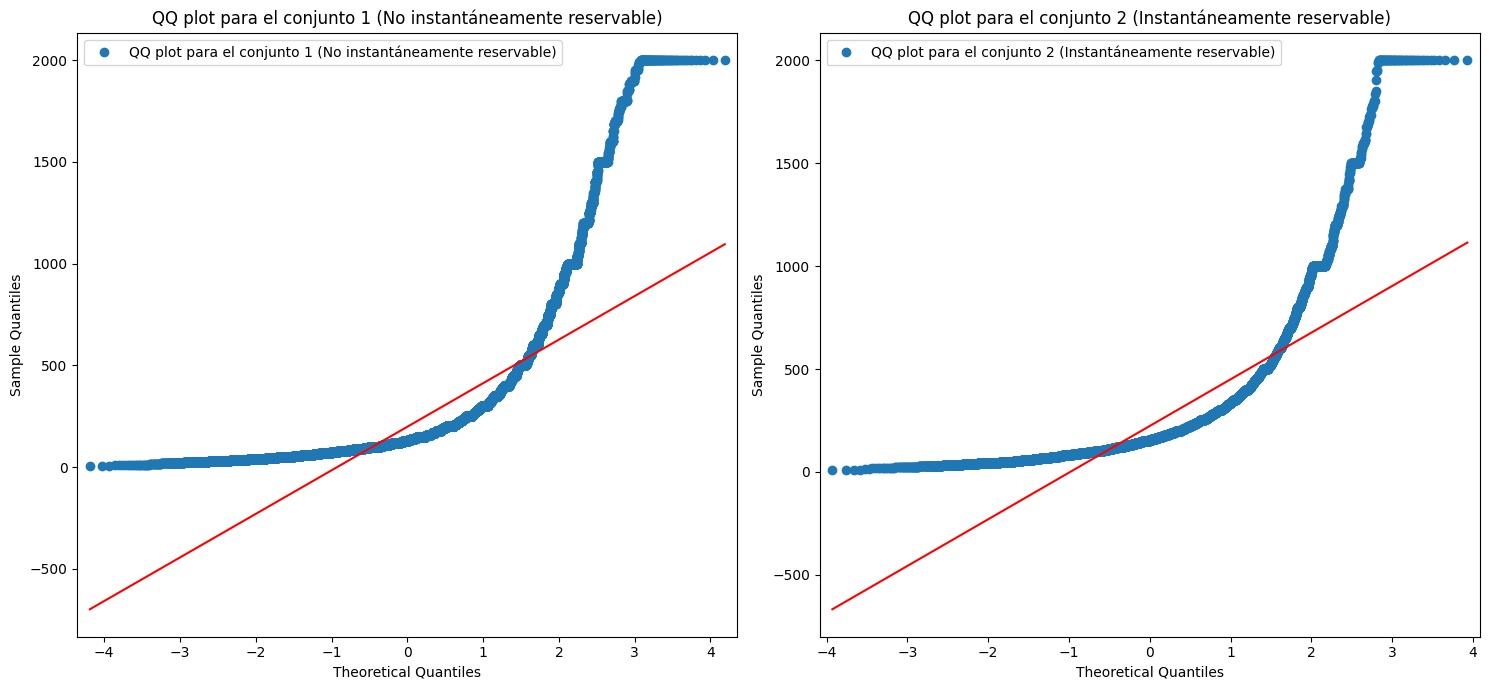

In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def generar_qqplot(conjunto, titulo, ax):
    sm.qqplot(conjunto, line='s', ax=ax)
    ax.set_title(titulo)
    ax.legend([titulo])

# Asegúrate de pasar solo los valores de la columna 'price' como un array unidimensional
instant_bookable_false = df[df['instant_bookable'] == 0]['price'].values
instant_bookable_true = df[df['instant_bookable'] == 1]['price'].values

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Generar QQ plots para ambos conjuntos
generar_qqplot(instant_bookable_false, 'QQ plot para el conjunto 1 (No instantáneamente reservable)', axes[0])
generar_qqplot(instant_bookable_true, 'QQ plot para el conjunto 2 (Instantáneamente reservable)', axes[1])

plt.tight_layout()
plt.show()

La línea roja representa una distribución normal, como vemos nuestros datos se alejan bastante de esta distribución normal por lo que no la siguen

In [14]:
df['host_is_superhost'].value_counts()

host_is_superhost
f    79522
t    15140
Name: count, dtype: int64

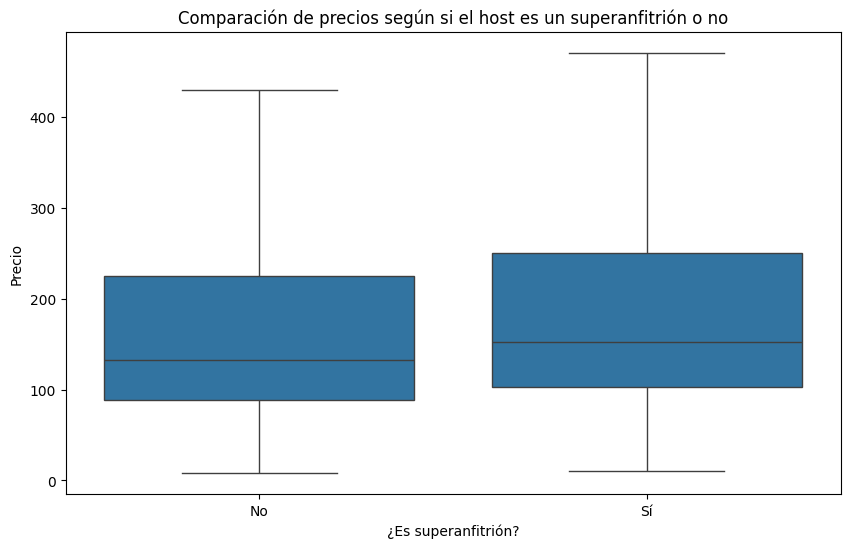

El valor estadístico para el conjunto 1 es: 8177.660974484941 y para el conjunto 2 es: 1369.1194402746623
Ambos conjuntos no siguen una distribución normal, se realiza una prueba de Mann-Whitney
El valor p para la prueba de Mann-Whitney es: 3.41816304678159e-126
Se rechaza la hipótesis nula, ambos conjuntos presentan diferencias significativas


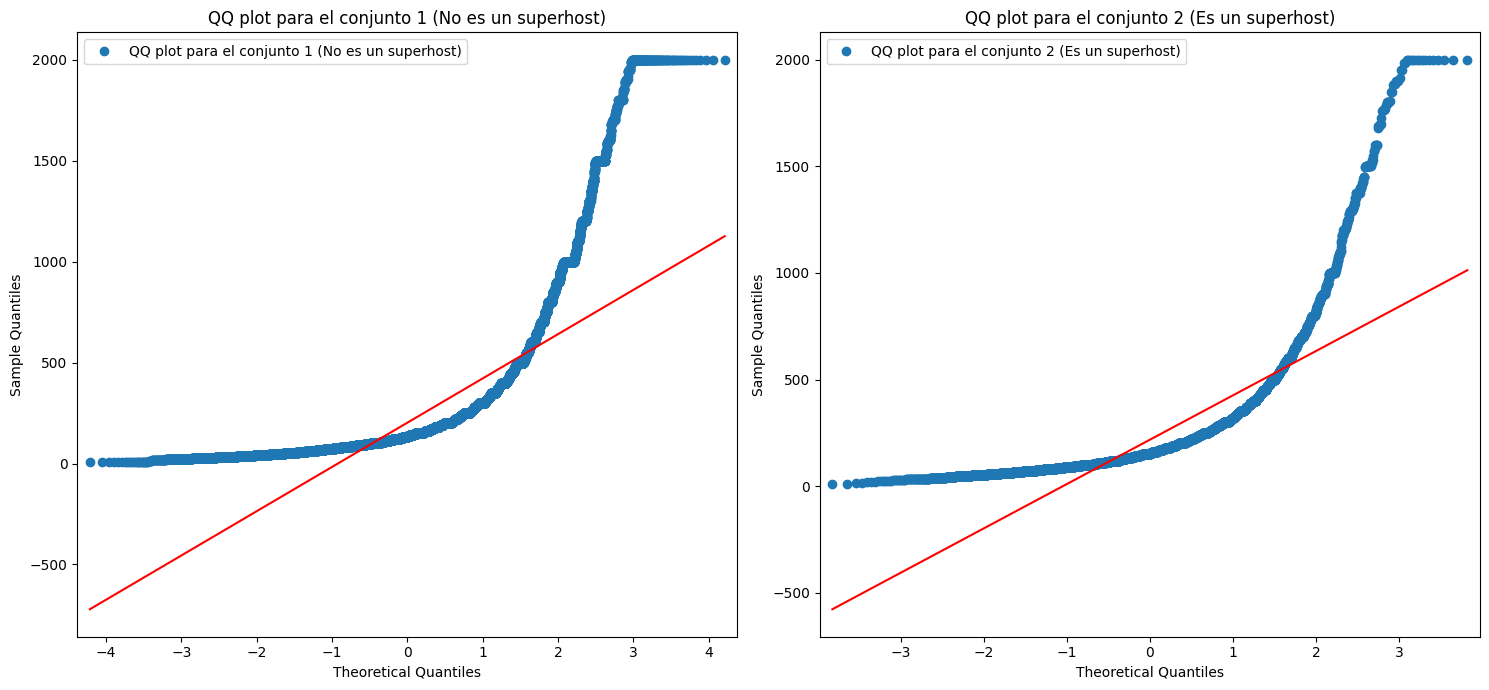

In [15]:
#Haremos la misma prueba para la variable host_is_superhost

# Visualizamos la distribución de los precios según si el host es superanfitrión o no en un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='price', data=df,showfliers=False)  # Crear el boxplot
plt.title('Comparación de precios según si el host es un superanfitrión o no')
plt.xlabel('¿Es superanfitrión?')
plt.ylabel('Precio')
plt.xticks(['f', 't'], ['No', 'Sí'])  # Cambiar etiquetas del eje x
plt.show()

# Creamos los dos conjuntos de datos para comparar los precios
superhost_false = df[df['host_is_superhost'] == 'f'][['price']]
superhost_true = df[df['host_is_superhost'] == 't'][['price']]
diagrama_flujo_test_hipótesis_Anderson_Darling(superhost_false,superhost_true, alpha = 0.05)

import statsmodels.api as sm
import matplotlib.pyplot as plt

def generar_qqplot(conjunto, titulo, ax):
    sm.qqplot(conjunto, line='s', ax=ax)
    ax.set_title(titulo)
    ax.legend([titulo])

# Asegúrate de pasar solo los valores de la columna 'price' como un array unidimensional
superhost_false_array = df[df['host_is_superhost'] == 'f']['price'].values
superhost_true_array = df[df['host_is_superhost'] == 't']['price'].values

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Generar QQ plots para ambos conjuntos
generar_qqplot(superhost_false_array, 'QQ plot para el conjunto 1 (No es un superhost)', axes[0])
generar_qqplot(superhost_true_array, 'QQ plot para el conjunto 2 (Es un superhost)', axes[1])

plt.tight_layout()
plt.show()


## 3 - Reseñas

In [16]:
df['Review?'].value_counts()    

Review?
Con review    68039
Sin review    26623
Name: count, dtype: int64

In [17]:
'''En primer lugar, para analizar los alquileres según la reseña, tenemos que crear un dataframe con las columnas de 
interés y solo para aquellas filas que tengan reseñas, basándonos en la columna 'Review?'''

# Creamos un DataFrame con las columnas de interés y solo para las filas con reseñas
df_reviews = df[df['Review?']=='Con review'][['review_scores_rating', 'review_scores_accuracy', 
                                                       'review_scores_cleanliness', 'review_scores_checkin', 
                                                       'review_scores_communication', 'review_scores_location', 
                                                       'review_scores_value','price','neighbourhood_cleansed']]


### 3.1 - ¿Qué barrio tiene las mejores puntuaciones promedio?

C:\Users\spide\AppData\Local\Temp\ipykernel_38712\1208413431.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




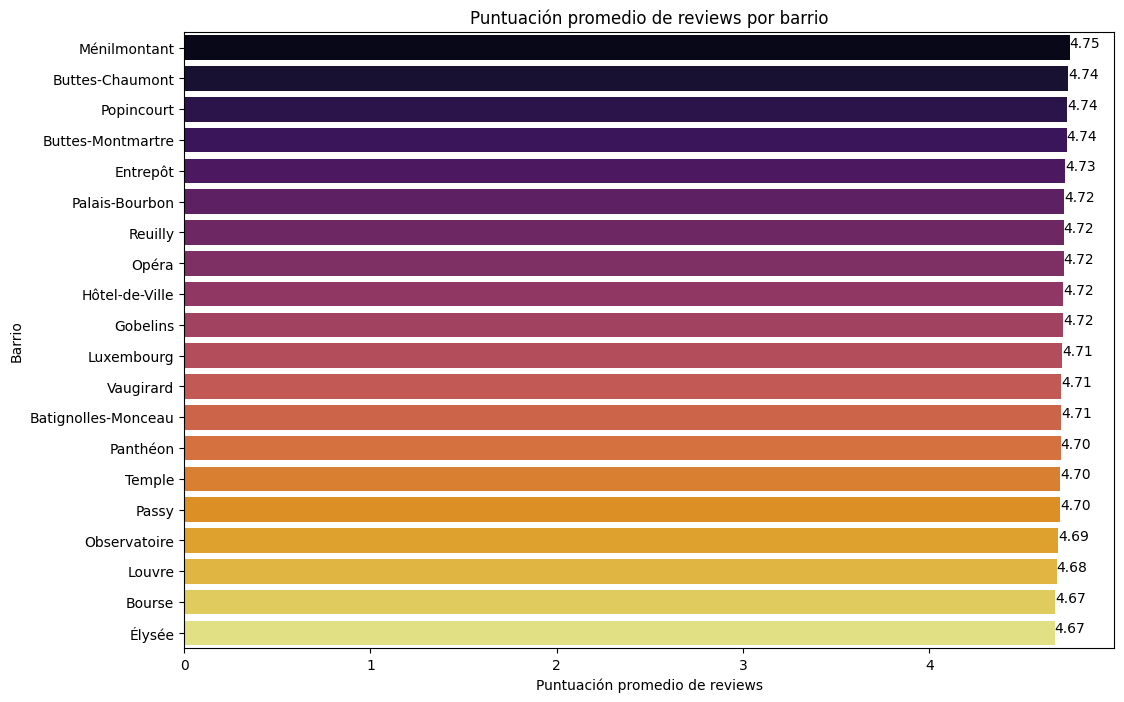

In [18]:
# Calcular la puntuación promedio de reviews por barrio
avg_reviews_by_neighbourhood = df_reviews.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().reset_index()

# Ordenar los barrios por la puntuación promedio de reviews
avg_reviews_by_neighbourhood = avg_reviews_by_neighbourhood.sort_values(by='review_scores_rating', ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x='review_scores_rating', y='neighbourhood_cleansed', data=avg_reviews_by_neighbourhood, palette='inferno')
plt.title('Puntuación promedio de reviews por barrio')
plt.xlabel('Puntuación promedio de reviews')
plt.ylabel('Barrio')

# Añadir etiquetas de datos
for index, value in enumerate(avg_reviews_by_neighbourhood['review_scores_rating']):
    plt.text(value, index, f'{value:.2f}')

plt.show()

In [19]:
df['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Buttes-Montmartre      10490
Popincourt              8360
Vaugirard               7692
Batignolles-Monceau     6604
Entrepôt                6432
Passy                   6040
Buttes-Chaumont         5360
Ménilmontant            5177
Opéra                   4610
Reuilly                 3956
Temple                  3892
Observatoire            3581
Gobelins                3264
Bourse                  3122
Panthéon                3005
Élysée                  2882
Hôtel-de-Ville          2841
Luxembourg              2698
Palais-Bourbon          2630
Louvre                  2026
Name: count, dtype: int64

El promedio de críticas más elevado se encuentra en **Temple**. 

**Bourse, Hotél-de-Ville, Pantheón, Louvre y Entrepôt** tienen buenas críticas también, oscilando su media entorno al 3.63-3.69.

Curiosamente, los alojamientos de **Passy y Élysée** son de los barrios con peor crítica promedio, y a su vez dos de los más caros, esto nos lleva a preguntarnos, ***existe una relación entre el precio y las reviews***?

#### 3.1.1 - ¿Existe una relación entre el precio y la puntuación de las reviews?

In [20]:
#En primer lugar usaremos una prueba de Anderson-Darling para ver si los datos siguen una distribución normal
price = df['price']
reviews = df['review_scores_rating']    
#usamos la prueba de Anderson-Darling para ver si los datos siguen una distribución normal
stat_price, crit_price, sig_price = anderson(price)
stat_reviews, crit_reviews, sig_reviews = anderson(reviews)
if stat_price < crit_price[2] and stat_reviews < crit_reviews[2]:  # Usamos el valor crítico para el 5% de significancia
    print('Ambos conjuntos siguen una distribución normal')
else:
    print('Ambos conjuntos no siguen una distribución normal')

Ambos conjuntos no siguen una distribución normal


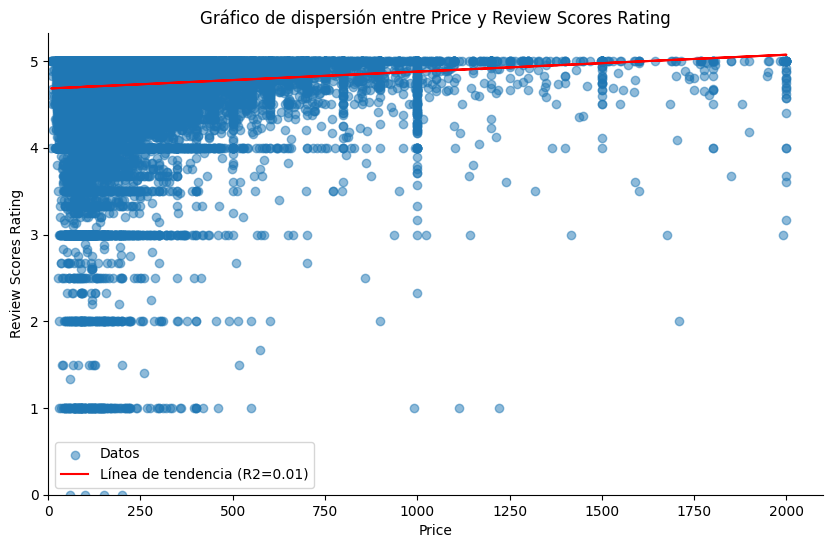

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_reviews[['price']]
y = df_reviews['review_scores_rating']

# Creamos y ajustamos un modelo de regresión lineal para el cálculo de R2
model = LinearRegression()
model.fit(X, y)

# Predecimos los valores de y
y_pred = model.predict(X)

# Calcular el valor de R2
r2 = r2_score(y, y_pred)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_reviews['price'], df_reviews['review_scores_rating'], alpha=0.5, label='Datos')
plt.plot(df_reviews['price'], y_pred, color='red', label=f'Línea de tendencia (R2={r2:.2f})')
plt.title('Gráfico de dispersión entre Price y Review Scores Rating')
plt.xlabel('Price')
plt.ylabel('Review Scores Rating')
plt.legend()

# Ajustar los límites del eje para que comiencen en 0
plt.xlim(left=0)
plt.ylim(bottom=0)

# Ocultar el eje superior y el derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Se puede observar que la mayoria de datos para reviews altas, entre 4-5 se agrupan antes de los 1000$. Lo que nos da una idea de que a mayor precio no implica unas mejores reseñas generales, aunque si nos fijamos por encima de los 1000$ las reviews suelen ser mayores de 3, como el promedio de las mismas. Sin embargo vamos a realizar una **prueba de correlación de Spearman** , ya que **no se ajustan a una distribución *Gaussiana* .**

In [22]:
from scipy.stats import spearmanr
stat, p = spearmanr(X, y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.145, p=0.000
Probablemente dependientes


Parece ser que si que hay relación entre el precio y las reviews, así que para realizaremos una clasificación del precio en muy bajo, bajo, medio, alto, muy alto y compararemos el promedio de sus reviews en un gráfico de barras.

In [23]:
df['price'].describe()

count    94662.000000
mean       204.659547
std        217.637734
min          8.000000
25%         90.000000
50%        139.000000
75%        230.000000
max       2000.000000
Name: price, dtype: float64

In [24]:
'''En base a los cuartiles que hemos visto con la función describe, vamos a crear una nueva columna en el DataFrame que
indique si el precio es muy bajo, bajo, medio, alto o muy alto. Para ello, vamos a usar los siguientes intervalos:
Muy bajo : 0-50 
Bajo: 50-90 
Medio: 90-139 
Alto: 139-230 
Muy Alto: >230'''

bins = [0, 50, 90, 139, 230, float('inf')]
labels = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']

df_reviews['price_classification'] = pd.cut(df_reviews['price'], bins=bins, labels=labels, right=False)
#También lo haremos para df por si la usamos más tarde
df['price_classification'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Verificar la nueva columna
print(df_reviews[['price', 'price_classification']].head())

   price price_classification
0  113.0                Medio
1   95.0                Medio
2  145.0                 Alto
3  180.0                 Alto
5   95.0                Medio


C:\Users\spide\AppData\Local\Temp\ipykernel_38712\316495021.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\spide\AppData\Local\Temp\ipykernel_38712\316495021.py:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



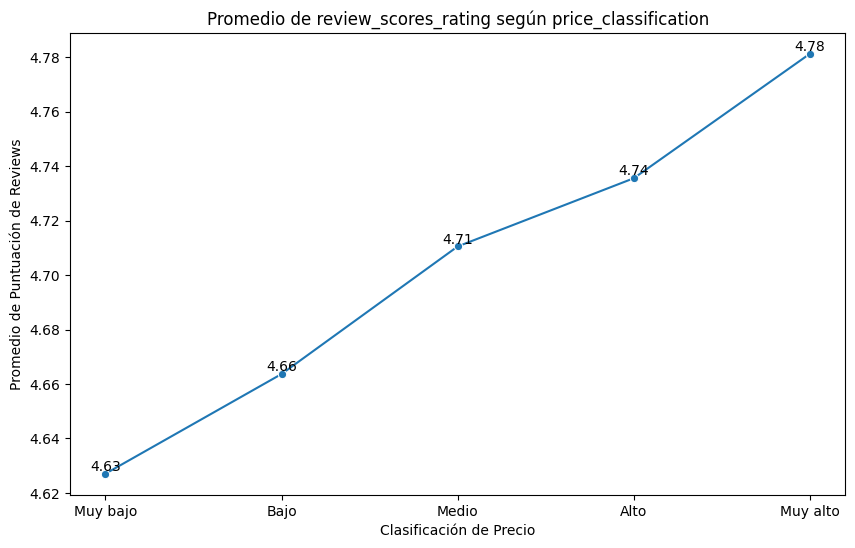

In [30]:

# Calcular el promedio de review_scores_rating por price_classification
avg_review_by_price_class = df_reviews.groupby('price_classification')['review_scores_rating'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='price_classification', y='review_scores_rating', data=avg_review_by_price_class, marker='o', palette='viridis')
plt.title('Promedio de review_scores_rating según price_classification')
plt.xlabel('Clasificación de Precio')
plt.ylabel('Promedio de Puntuación de Reviews')

# Añadir etiquetas de datos
for index, value in enumerate(avg_review_by_price_class['review_scores_rating']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()